# notebook for data grouping 

### Biopython

In [1]:
from Bio import SeqIO, AlignIO
from Bio.SeqUtils import GC
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [2]:
from pandas import Series, DataFrame
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import numpy as np

#### working directory

In [3]:
pwd

'/Users/migueldelrio/Desktop/panopea/jupyter'

#### directory of files 

In [4]:
ls ../panopea_data/data-results/*.f*

../panopea_data/data-results/Geoduck-transcriptome-v2.fasta*
../panopea_data/data-results/Geoduck-transcriptome-v3.fa
../panopea_data/data-results/Geoduck-transcriptome-v3annotated.fa
../panopea_data/data-results/blastout_query.part-01.fasta_sp.txt*


### checking fasta file

In [5]:
f = open('../panopea_data/data-results/Geoduck-transcriptome-v3.fa', 'r')
sizes = [(rec.name, len(rec)) for rec in SeqIO.parse(f, "fasta")]
#f.close()
sizesdataf= DataFrame(sizes) #, "contigs", "length")
sizesdataf.describe()


,1
count,153982.000000
mean,660.440233
std,765.421464
min,201.000000
25%,253.000000
50%,372.000000
75%,734.000000
max,18024.000000


It should give these results

| |1|
|-----|------|
|count	|153982.000000|
|mean	|660.440233|
|std	|765.421464|
|min	|201.000000|
|25%	|253.000000|
|50%	|372.000000|
|75%	|734.000000|
|max	|18024.000000|

### CpG calculation

In [8]:
#para el calculo de CpG
def CpG(se):
    g= se.seq.count("G")
    c= se.seq.count("C")
    cg= se.seq.count("CG")
    lar= len(se.seq)
    cpG=0
    try:
        g*c==0
    except:
        #print (sec.id)
        #record_id.append(sec.id)
        #record_cpg.append(0.0000)
        cpG=0
    else:
        #print (sec.id, round(cg/(g*c)*(lar**2/(lar-1)) ,8))
        #record_id.append(record.id)
        #record_cpg.append(round(cg/(g*c)*(lar**2/(lar-1)) ,8)) 
        cpG=(round(cg/(g*c)*(lar**2/(lar-1)) ,8))
    return(cpG)

In [9]:
f= open('../panopea_data/data-results/Geoduck-transcriptome-v3.fa', 'r')
out_file =[]
#out_file.append('contig,length')
linea=""
n=0
for sec in SeqIO.parse(f, 'fasta'):
    g= sec.seq.count("G")
    c= sec.seq.count("C")
    cg= sec.seq.count("CG")
    lar= len(sec.seq)
    cpG=0
    try:
        g*c==0
    except:
        cpG=0
    else:
        cpG=(round(cg/(g*c)*(lar**2/(lar-1)) ,8))
    linea= (sec.id,len(sec.seq),round(GC(sec.seq),4),cpG)
    #print (linea)
    out_file.append(linea)
    #if n==10:
    #    #break
    #n+=1

out_file = DataFrame(out_file)
out_file = out_file.rename(columns={0: 'ContigID', 1: 'length', 2:"GC content", 3: "CpG"})
out_file.describe()

,length,GC content,CpG
count,153982.000000,153982.000000,153982.000000
mean,660.440233,36.034563,0.547723
std,765.421464,6.727696,0.323846
min,201.000000,13.043500,0.000000
25%,253.000000,31.065650,0.323447
50%,372.000000,34.905700,0.492127
75%,734.000000,40.390000,0.727148
max,18024.000000,84.386600,3.514344


It should give these results

|	|length|GC content	|CpG|
|---|------|--|---------|---|
|count	|153982.000000	|153982.000000	|153982.000000|
|mean	|660.440233	|36.034563	|0.547723|
|std	|765.421464	|6.727696	|0.323846|
|min	|201.000000	|13.043500	|0.000000|
|25%	|253.000000	|31.065650	|0.323447|
|50%	|372.000000	|34.905700	|0.492127|
|75%	|734.000000	|40.390000	|0.727148|
|max	|18024.000000	|84.386600	|3.514344|

In [10]:
%matplotlib inline

#### sequences description from notebook
*01-Geoduck-fasta-v3.ipynb*

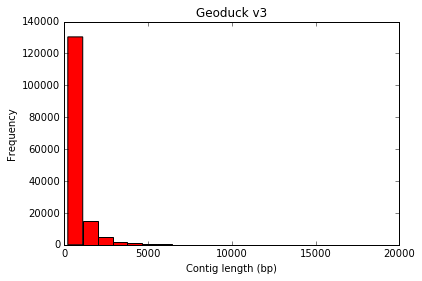

In [11]:
ax= plt.gca()
ax.hist(out_file['length'], bins=20, color = 'r')
ax.set_xlabel('Contig length (bp)')
ax.set_ylabel('Frequency')
ax.set_title (r"Geoduck v3")
#plt.savefig("../img/Geoduck-transcriptome-v3length.png")
plt.show()

### log10 transformation

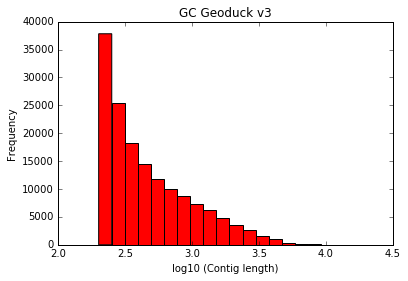

In [12]:
ax= plt.gca()
ax.hist(np.log10(out_file['length']), bins=20, color = 'r')
ax.set_xlabel('log10 (Contig length)')
ax.set_ylabel('Frequency')
ax.set_title (r"GC Geoduck v3")
#plt.savefig("../img/Geoduck-transcriptome-v3loglength.png")
plt.show()

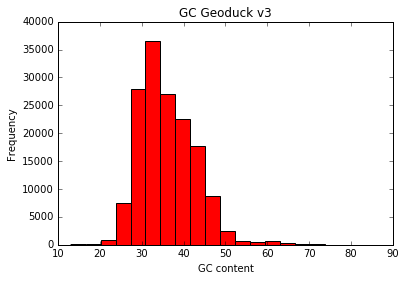

In [13]:
ax= plt.gca()
ax.hist(out_file['GC content'], bins=20, color = 'r')
ax.set_xlabel('GC content')
ax.set_ylabel('Frequency')
ax.set_title (r"GC Geoduck v3")
#plt.savefig("../img/Geoduck-transcriptome-v3gc.png")
plt.show()

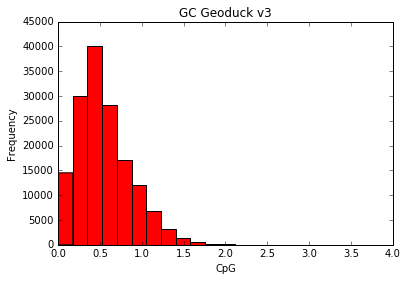

In [14]:
ax= plt.gca()
ax.hist(out_file['CpG'], bins=20, color = 'r')
ax.set_xlabel('CpG')
ax.set_ylabel('Frequency')
ax.set_title (r"GC Geoduck v3")
#plt.savefig("../img/Geoduck-transcriptome-v3gc.png")
plt.show()

In [15]:
# data are restricted to the first 50 elements 
out_file[:50]

,ContigID,length,GC content,CpG
0,comp100000_c0_seq1,453,33.9956,0.919033
1,comp100001_c1_seq1,493,30.4260,0.264219
2,comp100001_c2_seq1,558,30.6452,0.233631
3,comp100002_c0_seq1,208,40.8654,0.985872
4,comp100004_c1_seq1,276,31.5217,0.439224
5,comp100007_c0_seq1,734,32.1526,0.689395
6,comp100010_c0_seq1,246,38.2114,1.136696
7,comp100011_c0_seq1,315,33.6508,0.562483
8,comp100012_c0_seq1,218,35.3211,0.152087
9,comp100014_c0_seq1,389,32.9049,0.571851


## adding annotation from file
### Geoduck-tranv3-blastx_sprot.sorted
#### this file was obtained from notebook *01.2-Geo-Trans-annotation.ipynb*

In [16]:
ls ../panopea_data/data-results/Geoduck-tranv3*


../panopea_data/data-results/Geoduck-tranv3-blastx_sprot.sorted.txt*
../panopea_data/data-results/Geoduck-tranv3-blastx_sprot_sorted.csv


In [17]:
f_annotation = pd.read_csv ("../panopea_data/data-results/Geoduck_v3_uniprot_wGO.csv", index_col=None)
f_annotation[:50]

,ContigID,evalue,UniProt_Acc,Gene ontology IDs,Gene ontology (GO),Protein names
0,comp100065_c0_seq1,2.000000e-08,Q5PRC1,GO:0016021,integral to membrane,Lipoma HMGIC fusion partner homolog
1,comp100097_c0_seq1,2.000000e-37,Q9UI26,GO:0005737; GO:0005634; GO:0008565; GO:0006610,cytoplasm; nucleus; protein transporter activi...,Importin-11 (Imp11) (Ran-binding protein 11) (...
2,comp100104_c2_seq1,3.000000e-29,Q9NZJ4,GO:0005524; GO:0030424; GO:0070852; GO:0008219...,ATP binding; axon; cell body fiber; cell death...,Sacsin (DnaJ homolog subfamily C member 29) (D...
3,comp100105_c1_seq1,2.000000e-73,P18756,GO:0005634; GO:0010595; GO:0045765; GO:0043565...,nucleus; positive regulation of endothelial ce...,Protein c-ets-1-B (C-ets-1B) (XE1-B) (Fragment)
4,comp100108_c1_seq1,3.000000e-59,Q9U943,GO:0016055; GO:0005576; GO:0008289; GO:0005319,Wnt receptor signaling pathway; extracellular ...,Apolipophorins [Cleaved into: Apolipophorin-2 ...
5,comp100109_c0_seq1,6.000000e-23,O75443,GO:0031225; GO:0007160; GO:0005201; GO:0005886...,anchored to membrane; cell-matrix adhesion; ex...,Alpha-tectorin
6,comp100113_c0_seq1,2.000000e-06,Q95US5,GO:0000139; GO:0008376; GO:0016051; GO:0075015...,Golgi membrane; acetylgalactosaminyltransferas...,"Beta-1,3-galactosyltransferase bre-5 (EC 2.4.1..."
7,comp100113_c0_seq2,9.000000e-13,Q9N295,GO:0000139; GO:0005783; GO:0008378; GO:0016021...,Golgi membrane; endoplasmic reticulum; galacto...,"Beta-1,3-galactosyltransferase 5 (Beta-1,3-Gal..."
8,comp100113_c1_seq1,7.000000e-09,Q9MYM7,GO:0000139; GO:0008378; GO:0016021; GO:0006486,Golgi membrane; galactosyltransferase activity...,"Beta-1,3-galactosyltransferase 1 (Beta-1,3-Gal..."
9,comp100129_c0_seq1,9.000000e-30,Q14644,GO:0005099; GO:0015278; GO:0005737; GO:0035556...,Ras GTPase activator activity; calcium-release...,Ras GTPase-activating protein 3 (GAP1(IP4BP)) ...


# merging with annotated values only

In [18]:
f2 = pd.merge(out_file, f_annotation,  how='inner')
f2[:50]

,ContigID,length,GC content,CpG,evalue,UniProt_Acc,Gene ontology IDs,Gene ontology (GO),Protein names
0,comp100065_c0_seq1,201,50.2488,0.886765,2.000000e-08,Q5PRC1,GO:0016021,integral to membrane,Lipoma HMGIC fusion partner homolog
1,comp100097_c0_seq1,679,43.0044,0.486758,2.000000e-37,Q9UI26,GO:0005737; GO:0005634; GO:0008565; GO:0006610,cytoplasm; nucleus; protein transporter activi...,Importin-11 (Imp11) (Ran-binding protein 11) (...
2,comp100104_c2_seq1,422,36.9668,0.563721,3.000000e-29,Q9NZJ4,GO:0005524; GO:0030424; GO:0070852; GO:0008219...,ATP binding; axon; cell body fiber; cell death...,Sacsin (DnaJ homolog subfamily C member 29) (D...
3,comp100105_c1_seq1,863,47.0452,0.503791,2.000000e-73,P18756,GO:0005634; GO:0010595; GO:0045765; GO:0043565...,nucleus; positive regulation of endothelial ce...,Protein c-ets-1-B (C-ets-1B) (XE1-B) (Fragment)
4,comp100108_c1_seq1,1185,44.0506,0.509202,3.000000e-59,Q9U943,GO:0016055; GO:0005576; GO:0008289; GO:0005319,Wnt receptor signaling pathway; extracellular ...,Apolipophorins [Cleaved into: Apolipophorin-2 ...
5,comp100109_c0_seq1,701,39.2297,0.633105,6.000000e-23,O75443,GO:0031225; GO:0007160; GO:0005201; GO:0005886...,anchored to membrane; cell-matrix adhesion; ex...,Alpha-tectorin
6,comp100113_c0_seq1,381,40.4199,1.162870,2.000000e-06,Q95US5,GO:0000139; GO:0008376; GO:0016051; GO:0075015...,Golgi membrane; acetylgalactosaminyltransferas...,"Beta-1,3-galactosyltransferase bre-5 (EC 2.4.1..."
7,comp100113_c0_seq2,421,41.0926,0.982745,9.000000e-13,Q9N295,GO:0000139; GO:0005783; GO:0008378; GO:0016021...,Golgi membrane; endoplasmic reticulum; galacto...,"Beta-1,3-galactosyltransferase 5 (Beta-1,3-Gal..."
8,comp100113_c1_seq1,283,36.0424,1.421658,7.000000e-09,Q9MYM7,GO:0000139; GO:0008378; GO:0016021; GO:0006486,Golgi membrane; galactosyltransferase activity...,"Beta-1,3-galactosyltransferase 1 (Beta-1,3-Gal..."
9,comp100129_c0_seq1,351,47.0085,0.366888,9.000000e-30,Q14644,GO:0005099; GO:0015278; GO:0005737; GO:0035556...,Ras GTPase activator activity; calcium-release...,Ras GTPase-activating protein 3 (GAP1(IP4BP)) ...


In [19]:
len(out_file), len(f_annotation), len(f2)

(153982, 22974, 22974)

# merging with all values

In [20]:
f2 = pd.merge(out_file, f_annotation,  how='outer')
f2[:50]

,ContigID,length,GC content,CpG,evalue,UniProt_Acc,Gene ontology IDs,Gene ontology (GO),Protein names
0,comp100000_c0_seq1,453,33.9956,0.919033,NaN,NaN,NaN,NaN,NaN
1,comp100001_c1_seq1,493,30.4260,0.264219,NaN,NaN,NaN,NaN,NaN
2,comp100001_c2_seq1,558,30.6452,0.233631,NaN,NaN,NaN,NaN,NaN
3,comp100002_c0_seq1,208,40.8654,0.985872,NaN,NaN,NaN,NaN,NaN
4,comp100004_c1_seq1,276,31.5217,0.439224,NaN,NaN,NaN,NaN,NaN
5,comp100007_c0_seq1,734,32.1526,0.689395,NaN,NaN,NaN,NaN,NaN
6,comp100010_c0_seq1,246,38.2114,1.136696,NaN,NaN,NaN,NaN,NaN
7,comp100011_c0_seq1,315,33.6508,0.562483,NaN,NaN,NaN,NaN,NaN
8,comp100012_c0_seq1,218,35.3211,0.152087,NaN,NaN,NaN,NaN,NaN
9,comp100014_c0_seq1,389,32.9049,0.571851,NaN,NaN,NaN,NaN,NaN


In [21]:
len(f2)

153982

In [22]:
f_exp = pd.read_csv ("../panopea_data/data-results/Male-v-Female-Expression.csv", index_col=None)
f_exp[:50]

,FeatureID,range,difference,fold_change,male_unique,male_total,female_unique,female_total
0,comp144588_c2_seq1,20506477,-20506477,-3.426534,28957409,28957409,8450932,8450932
1,comp144588_c3_seq1,19963924,-19963924,-3.796427,27102977,27103006,7139078,7139082
2,comp144588_c4_seq1,15492666,-15492666,-3.083767,22927597,22927597,7434931,7434931
3,comp144588_c1_seq1,822446,-822446,-3.120936,1210217,1210221,387774,387775
4,comp128741_c0_seq1,338448,-338448,-25.461405,352284,352284,13836,13836
5,comp123774_c0_seq1,277289,-277289,-16.474580,295208,295208,17919,17919
6,comp116632_c1_seq1,223849,-223849,-43.581130,229106,229106,5257,5257
7,comp138387_c0_seq1,198883,-198883,-3.196364,42277,289434,44959,90551
8,comp138387_c0_seq6,152574,-152574,-6.177265,124134,182044,13851,29470
9,comp116632_c0_seq1,115753,-115753,-66.881047,117510,117510,1757,1757


In [23]:
len(f_exp)

154407

### the file Male-v-Female-Expression.csv
seems to have the data from all contigs including the non-eukaryote

In [24]:
f_exp = f_exp.rename(columns={"FeatureID" : 'ContigID'})
f_exp[:50]

,ContigID,range,difference,fold_change,male_unique,male_total,female_unique,female_total
0,comp144588_c2_seq1,20506477,-20506477,-3.426534,28957409,28957409,8450932,8450932
1,comp144588_c3_seq1,19963924,-19963924,-3.796427,27102977,27103006,7139078,7139082
2,comp144588_c4_seq1,15492666,-15492666,-3.083767,22927597,22927597,7434931,7434931
3,comp144588_c1_seq1,822446,-822446,-3.120936,1210217,1210221,387774,387775
4,comp128741_c0_seq1,338448,-338448,-25.461405,352284,352284,13836,13836
5,comp123774_c0_seq1,277289,-277289,-16.474580,295208,295208,17919,17919
6,comp116632_c1_seq1,223849,-223849,-43.581130,229106,229106,5257,5257
7,comp138387_c0_seq1,198883,-198883,-3.196364,42277,289434,44959,90551
8,comp138387_c0_seq6,152574,-152574,-6.177265,124134,182044,13851,29470
9,comp116632_c0_seq1,115753,-115753,-66.881047,117510,117510,1757,1757


In [25]:
f3 = pd.merge(f2, f_exp, how='inner')
f3[:50]

,ContigID,length,GC content,CpG,evalue,UniProt_Acc,Gene ontology IDs,Gene ontology (GO),Protein names,range,difference,fold_change,male_unique,male_total,female_unique,female_total
0,comp100000_c0_seq1,453,33.9956,0.919033,NaN,NaN,NaN,NaN,NaN,4,4,1.571429,7,7,11,11
1,comp100001_c1_seq1,493,30.4260,0.264219,NaN,NaN,NaN,NaN,NaN,47,47,24.500000,2,2,49,49
2,comp100001_c2_seq1,558,30.6452,0.233631,NaN,NaN,NaN,NaN,NaN,75,75,11.714286,7,7,82,82
3,comp100002_c0_seq1,208,40.8654,0.985872,NaN,NaN,NaN,NaN,NaN,6,6,0.000000,0,0,6,6
4,comp100004_c1_seq1,276,31.5217,0.439224,NaN,NaN,NaN,NaN,NaN,7,-7,0.000000,7,7,0,0
5,comp100007_c0_seq1,734,32.1526,0.689395,NaN,NaN,NaN,NaN,NaN,77,77,5.529412,17,17,94,94
6,comp100010_c0_seq1,246,38.2114,1.136696,NaN,NaN,NaN,NaN,NaN,4,4,0.000000,0,0,4,4
7,comp100011_c0_seq1,315,33.6508,0.562483,NaN,NaN,NaN,NaN,NaN,19,19,3.111111,9,9,28,28
8,comp100012_c0_seq1,218,35.3211,0.152087,NaN,NaN,NaN,NaN,NaN,1,1,1.500000,2,2,3,3
9,comp100014_c0_seq1,389,32.9049,0.571851,NaN,NaN,NaN,NaN,NaN,32,32,3.000000,16,16,48,48


#### there are some contigs without Uniprot and GO data

In [26]:
len(f2), len(f3)

(153982, 153982)

# Calculating the expression and male and female features

In [27]:
mafa=[]
linea=''
n=200
for rows in f3.index:
    row= f3.ix[rows]
    linea=''
    if row["fold_change"]>100 and row['female_unique']>200 and row['male_unique']!=0:
        linea= row['ContigID'],"female>male" 
        #print (row['male_unique'],row['female_unique'],row["fold_change"], 'female>male')
    elif row["fold_change"]<-100 and row['male_unique']>200 and row['female_unique']!=0:
        linea= row['ContigID'],"male>female" 
        #print (row['male_unique'],row['female_unique'],row["fold_change"], 'male>female')
    elif row["fold_change"]>100 and row['female_unique']>200 and row['male_unique']==0:
        linea= row['ContigID'],"female" 
        #print (row['male_unique'],row['female_unique'],row["fold_change"], 'female')
    elif row["fold_change"]<-100 and row['male_unique']>200 and row['female_unique']==0:
        linea= row['ContigID'],"male"
        #print (row['male_unique'],row['female_unique'],row["fold_change"], 'male')
    else:
        linea= row['ContigID'],""
    mafa.append(linea)

mafa= pd.DataFrame(mafa, columns=['ContigID', 'sex'])
mafa.describe()        
mafa.groupby('sex')['ContigID'].count()

sex
               153430
female             42
female>male       339
male               35
male>female       136
Name: ContigID, dtype: int64

In [28]:
f4 = pd.merge(f3, mafa)
f4[:50]

,ContigID,length,GC content,CpG,evalue,UniProt_Acc,Gene ontology IDs,Gene ontology (GO),Protein names,range,difference,fold_change,male_unique,male_total,female_unique,female_total,sex
0,comp100000_c0_seq1,453,33.9956,0.919033,NaN,NaN,NaN,NaN,NaN,4,4,1.571429,7,7,11,11,
1,comp100001_c1_seq1,493,30.4260,0.264219,NaN,NaN,NaN,NaN,NaN,47,47,24.500000,2,2,49,49,
2,comp100001_c2_seq1,558,30.6452,0.233631,NaN,NaN,NaN,NaN,NaN,75,75,11.714286,7,7,82,82,
3,comp100002_c0_seq1,208,40.8654,0.985872,NaN,NaN,NaN,NaN,NaN,6,6,0.000000,0,0,6,6,
4,comp100004_c1_seq1,276,31.5217,0.439224,NaN,NaN,NaN,NaN,NaN,7,-7,0.000000,7,7,0,0,
5,comp100007_c0_seq1,734,32.1526,0.689395,NaN,NaN,NaN,NaN,NaN,77,77,5.529412,17,17,94,94,
6,comp100010_c0_seq1,246,38.2114,1.136696,NaN,NaN,NaN,NaN,NaN,4,4,0.000000,0,0,4,4,
7,comp100011_c0_seq1,315,33.6508,0.562483,NaN,NaN,NaN,NaN,NaN,19,19,3.111111,9,9,28,28,
8,comp100012_c0_seq1,218,35.3211,0.152087,NaN,NaN,NaN,NaN,NaN,1,1,1.500000,2,2,3,3,
9,comp100014_c0_seq1,389,32.9049,0.571851,NaN,NaN,NaN,NaN,NaN,32,32,3.000000,16,16,48,48,


In [29]:
f4.groupby('sex')['ContigID'].count()

sex
               153430
female             42
female>male       339
male               35
male>female       136
Name: ContigID, dtype: int64

In [30]:
f_exp = pd.read_table ("../panopea_data/data-results/Master-SP-Gig-Ruphi_Dh.txt", index_col=None, engine='python')
f_exp[:50]

,Pgen-ID,evalue-SP,SPID,ProteinName,Organism,GO,PFAM,evalue-GIG,Gigaton-ID,evalue-Ru,Ruphibase_ID,evalue-SIG,SigID,Cluster,Tissue-enriched-expression
0,comp123774_c0_seq1,0.000000e+00,P06603,Tubulin alpha-1 chain,Drosophila melanogaster (Fruit fly),antimicrobial humoral response [GO:0019730]; m...,PF00091;PF03953;,0.000000e+00,CHOYP_RABGAP1.1.1,0.000000e+00,ruditapes2_c97,0.000000e+00,AJ431728.p.cg.6,6.0,male gonad
1,comp140491_c1_seq2,1.000000e-119,Q25410,Putative molluscan insulin-related peptide(s) ...,Lymnaea stagnalis (Great pond snail) (Helix st...,transmembrane receptor protein tyrosine kinase...,PF00041;PF00757;PF07714;PF01030;,2.000000e-104,CHOYP_MIPR.1.2,NaN,NaN,1.000000e-101,AJ535669.p.cg.6,2.0,NaN
2,comp142230_c1_seq2,9.000000e-131,Q8MPM1,Gelsolin-like protein 2 (Actin-modulator) (EWA...,Lumbricus terrestris (Common earthworm),actin filament capping [GO:0051693],PF00626;,2.000000e-79,CHOYP_LOC100371249.1.1,NaN,NaN,7.000000e-74,AJ563467.p.cg.6,4.0,NaN
3,comp144511_c0_seq9,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,CHOYP_ANLN.1.1,NaN,NaN,2.000000e-116,AM237648.p.cg.6,7.0,NaN
4,comp139165_c0_seq2,0.000000e+00,P07201,Ribonucleoside-diphosphate reductase small cha...,Spisula solidissima (Atlantic surf-clam),deoxyribonucleoside diphosphate metabolic proc...,PF00268;,0.000000e+00,CHOYP_RIR2.1.1,4.000000e-86,ruditapes_c11036,5.000000e-83,AM237649.p.cg.6,9.0,NaN
5,comp144251_c0_seq2,0.000000e+00,Q6NX31,DNA replication licensing factor mcm7 (EC 3.6....,Xenopus tropicalis (Western clawed frog) (Silu...,cell cycle [GO:0007049]; DNA replication initi...,PF00493;PF14551;,0.000000e+00,CHOYP_MCM7.1.1,2.000000e-92,ruditapes_c23855,2.000000e-107,AM237674.p.cg.6,9.0,NaN
6,comp127584_c0_seq1,8.000000e-164,O15990,Arginine kinase (AK) (EC 2.7.3.3),Liolophura japonica (Chiton) (Acanthopleura ja...,NaN,PF00217;PF02807;,3.000000e-70,CHOYP_KARG.10.11,0.000000e+00,ruditapes2_c3369,7.000000e-151,AM853323.p.cg.6,5.0,male gonad
7,comp141715_c0_seq3,3.000000e-81,Q8T888,"Dynein light chain 1, axonemal (Leucine-rich r...",Ciona intestinalis (Transparent sea squirt) (A...,NaN,NaN,2.000000e-65,CHOYP_DNAL1.1.1,NaN,NaN,3.000000e-67,AM854208.p.cg.6,5.0,NaN
8,comp137929_c0_seq1,2.000000e-57,P62323,Small nuclear ribonucleoprotein Sm D3 (Sm-D3) ...,Xenopus laevis (African clawed frog),spliceosomal snRNP assembly [GO:0000387],PF01423;,4.000000e-93,CHOYP_LOC100115467.1.1,8.000000e-99,ruditapes_c2307,9.000000e-92,AM854229.p.cg.6,9.0,NaN
9,comp140253_c0_seq2,2.000000e-56,Q5R4X4,Translocon-associated protein subunit alpha (T...,Pongo abelii (Sumatran orangutan) (Pongo pygma...,NaN,PF03896;,NaN,NaN,NaN,NaN,2.000000e-64,AM854424.p.cg.6,3.0,NaN


In [31]:
len(f_exp)

153982

In [32]:
f_exp = f_exp.rename(columns={"Pgen-ID" : 'ContigID'})
f_exp[:50]

,ContigID,evalue-SP,SPID,ProteinName,Organism,GO,PFAM,evalue-GIG,Gigaton-ID,evalue-Ru,Ruphibase_ID,evalue-SIG,SigID,Cluster,Tissue-enriched-expression
0,comp123774_c0_seq1,0.000000e+00,P06603,Tubulin alpha-1 chain,Drosophila melanogaster (Fruit fly),antimicrobial humoral response [GO:0019730]; m...,PF00091;PF03953;,0.000000e+00,CHOYP_RABGAP1.1.1,0.000000e+00,ruditapes2_c97,0.000000e+00,AJ431728.p.cg.6,6.0,male gonad
1,comp140491_c1_seq2,1.000000e-119,Q25410,Putative molluscan insulin-related peptide(s) ...,Lymnaea stagnalis (Great pond snail) (Helix st...,transmembrane receptor protein tyrosine kinase...,PF00041;PF00757;PF07714;PF01030;,2.000000e-104,CHOYP_MIPR.1.2,NaN,NaN,1.000000e-101,AJ535669.p.cg.6,2.0,NaN
2,comp142230_c1_seq2,9.000000e-131,Q8MPM1,Gelsolin-like protein 2 (Actin-modulator) (EWA...,Lumbricus terrestris (Common earthworm),actin filament capping [GO:0051693],PF00626;,2.000000e-79,CHOYP_LOC100371249.1.1,NaN,NaN,7.000000e-74,AJ563467.p.cg.6,4.0,NaN
3,comp144511_c0_seq9,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,CHOYP_ANLN.1.1,NaN,NaN,2.000000e-116,AM237648.p.cg.6,7.0,NaN
4,comp139165_c0_seq2,0.000000e+00,P07201,Ribonucleoside-diphosphate reductase small cha...,Spisula solidissima (Atlantic surf-clam),deoxyribonucleoside diphosphate metabolic proc...,PF00268;,0.000000e+00,CHOYP_RIR2.1.1,4.000000e-86,ruditapes_c11036,5.000000e-83,AM237649.p.cg.6,9.0,NaN
5,comp144251_c0_seq2,0.000000e+00,Q6NX31,DNA replication licensing factor mcm7 (EC 3.6....,Xenopus tropicalis (Western clawed frog) (Silu...,cell cycle [GO:0007049]; DNA replication initi...,PF00493;PF14551;,0.000000e+00,CHOYP_MCM7.1.1,2.000000e-92,ruditapes_c23855,2.000000e-107,AM237674.p.cg.6,9.0,NaN
6,comp127584_c0_seq1,8.000000e-164,O15990,Arginine kinase (AK) (EC 2.7.3.3),Liolophura japonica (Chiton) (Acanthopleura ja...,NaN,PF00217;PF02807;,3.000000e-70,CHOYP_KARG.10.11,0.000000e+00,ruditapes2_c3369,7.000000e-151,AM853323.p.cg.6,5.0,male gonad
7,comp141715_c0_seq3,3.000000e-81,Q8T888,"Dynein light chain 1, axonemal (Leucine-rich r...",Ciona intestinalis (Transparent sea squirt) (A...,NaN,NaN,2.000000e-65,CHOYP_DNAL1.1.1,NaN,NaN,3.000000e-67,AM854208.p.cg.6,5.0,NaN
8,comp137929_c0_seq1,2.000000e-57,P62323,Small nuclear ribonucleoprotein Sm D3 (Sm-D3) ...,Xenopus laevis (African clawed frog),spliceosomal snRNP assembly [GO:0000387],PF01423;,4.000000e-93,CHOYP_LOC100115467.1.1,8.000000e-99,ruditapes_c2307,9.000000e-92,AM854229.p.cg.6,9.0,NaN
9,comp140253_c0_seq2,2.000000e-56,Q5R4X4,Translocon-associated protein subunit alpha (T...,Pongo abelii (Sumatran orangutan) (Pongo pygma...,NaN,PF03896;,NaN,NaN,NaN,NaN,2.000000e-64,AM854424.p.cg.6,3.0,NaN


In [33]:
f5 = pd.merge(f4, f_exp)
f5[:50]

,ContigID,length,GC content,CpG,evalue,UniProt_Acc,Gene ontology IDs,Gene ontology (GO),Protein names,range,...,GO,PFAM,evalue-GIG,Gigaton-ID,evalue-Ru,Ruphibase_ID,evalue-SIG,SigID,Cluster,Tissue-enriched-expression
0,comp100000_c0_seq1,453,33.9956,0.919033,NaN,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,comp100001_c1_seq1,493,30.4260,0.264219,NaN,NaN,NaN,NaN,NaN,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,comp100001_c2_seq1,558,30.6452,0.233631,NaN,NaN,NaN,NaN,NaN,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,comp100002_c0_seq1,208,40.8654,0.985872,NaN,NaN,NaN,NaN,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,comp100004_c1_seq1,276,31.5217,0.439224,NaN,NaN,NaN,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,comp100007_c0_seq1,734,32.1526,0.689395,NaN,NaN,NaN,NaN,NaN,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,comp100010_c0_seq1,246,38.2114,1.136696,NaN,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,comp100011_c0_seq1,315,33.6508,0.562483,NaN,NaN,NaN,NaN,NaN,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,comp100012_c0_seq1,218,35.3211,0.152087,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,comp100014_c0_seq1,389,32.9049,0.571851,NaN,NaN,NaN,NaN,NaN,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
f5.to_csv("../panopea_data/data-results/Geoduck-transcriptome_v3_bigtable.csv",index=None)

### setting "ContigID" column as index

In [35]:
f5.set_index(["ContigID"])

,length,GC content,CpG,evalue,UniProt_Acc,Gene ontology IDs,Gene ontology (GO),Protein names,range,difference,...,GO,PFAM,evalue-GIG,Gigaton-ID,evalue-Ru,Ruphibase_ID,evalue-SIG,SigID,Cluster,Tissue-enriched-expression
ContigID,,,,,,,,,,,,,,,,,,,,,
comp100000_c0_seq1,453,33.9956,0.919033,NaN,NaN,NaN,NaN,NaN,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comp100001_c1_seq1,493,30.4260,0.264219,NaN,NaN,NaN,NaN,NaN,47,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comp100001_c2_seq1,558,30.6452,0.233631,NaN,NaN,NaN,NaN,NaN,75,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comp100002_c0_seq1,208,40.8654,0.985872,NaN,NaN,NaN,NaN,NaN,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comp100004_c1_seq1,276,31.5217,0.439224,NaN,NaN,NaN,NaN,NaN,7,-7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comp100007_c0_seq1,734,32.1526,0.689395,NaN,NaN,NaN,NaN,NaN,77,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comp100010_c0_seq1,246,38.2114,1.136696,NaN,NaN,NaN,NaN,NaN,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comp100011_c0_seq1,315,33.6508,0.562483,NaN,NaN,NaN,NaN,NaN,19,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comp100012_c0_seq1,218,35.3211,0.152087,NaN,NaN,NaN,NaN,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## copying annotation "Protein names" to the fasta file

In [36]:
f = open('../panopea_data/data-results/Geoduck-transcriptome-v3.fa', 'r')
secuencias=[]
linea=''
n=0
for rec in SeqIO.parse(f, "fasta"):
    descripcion = str(f5.loc[f5["ContigID"]==rec.id]['Protein names'].values[0])
    if descripcion != "nan" :
        linea =SeqRecord(rec.seq, id=rec.id, description="PREDICTED "+descripcion[:])
    else :
        linea =SeqRecord(rec.seq, id=rec.id, description=rec.id)#rec.description)
    secuencias.append(linea)

In [37]:
SeqIO.write(secuencias, '../panopea_data/data-results/Geoduck-transcriptome-v3annotated.fa', 'fasta')


153982